In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dữ liệu từ file weathers.csv

In [12]:
df = pd.read_csv('weathers.csv')
df.columns

Index(['Date', 'Average temperature', 'Average dewpoint', 'Average windspeed',
       'Average direction', 'Rainfall for year', 'Maximum temperature',
       'Maximum humidity', 'Maximum pressure', 'Maximum windspeed ',
       'Maximum heat index', 'Average humidity', 'Average barometer',
       'Average gustspeed', 'Rainfall for month', 'Maximum rain per minute',
       'Minimum temperature', 'Minimum humidity', 'Minimum pressure',
       'Maximum gust speed'],
      dtype='object')

# Lọc dữ liệu chỉ lấy những cột có ảnh hưởng

In [13]:
col_use = ['Date', 'Average temperature', 'Average dewpoint', 'Average windspeed', 'Average direction', 
           'Average humidity', 'Average barometer','Average gustspeed', 'Rainfall for month']
df = df[col_use]

In [14]:
# điền vào các giá trị nan với phương thức là bfill
df = df.fillna(method='bfill')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df_index = df.set_index(['Date'])
df_index

,Average temperature,Average dewpoint,Average windspeed,Average direction,Average humidity,Average barometer,Average gustspeed,Rainfall for month
Date,,,,,,,,
2015-01-01,8.1,-2.1,1.2,28.00,65.0,30.4,2.3,0.01
2015-01-02,61.0,30.1,4.8,0.01,8.6,3.1,275.0,0.01
2015-01-03,24.2,10.1,7.4,242.00,56.0,29.9,10.9,0.01
2015-01-04,47.0,30.3,18.0,0.01,8.7,11.3,237.0,0.01
2015-01-05,38.9,21.9,20.7,247.00,50.0,30.0,30.8,0.02
...,...,...,...,...,...,...,...,...
2021-12-27,76.0,29.6,4.5,0.50,15.9,2.8,242.0,1.04
2021-12-28,21.0,6.5,9.8,208.00,54.0,29.4,14.4,0.50
2021-12-29,57.0,29.7,12.1,0.50,10.4,8.3,234.0,1.04


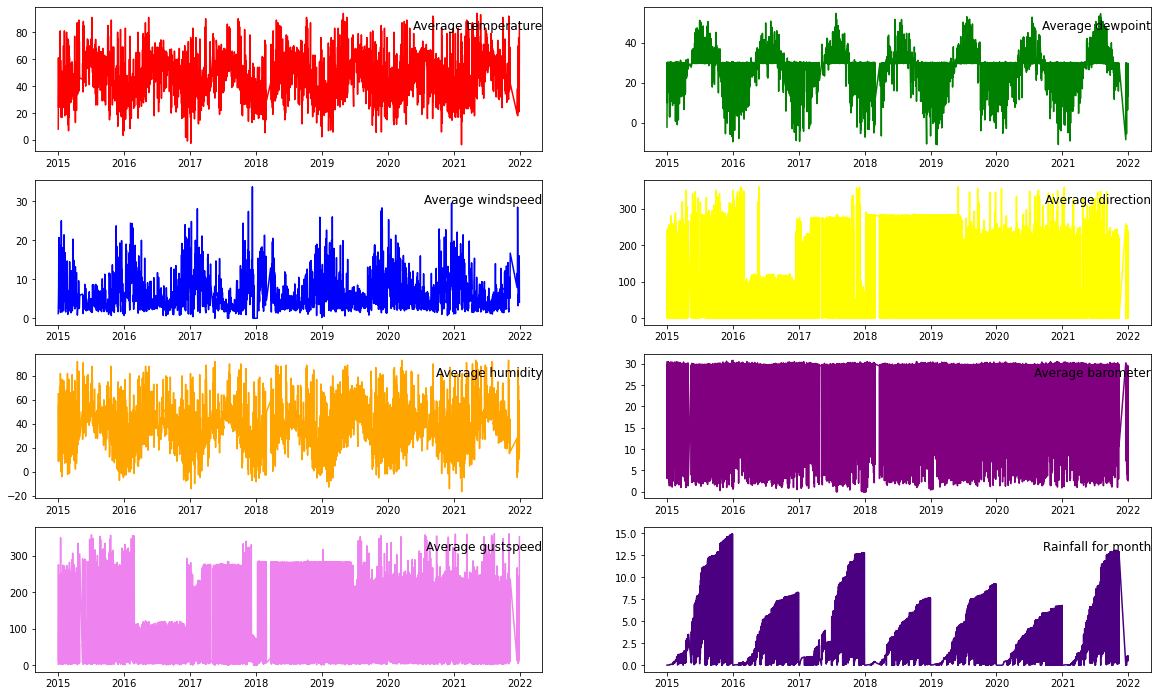

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'violet', 'indigo']

plt.figure(figsize=(20,25))
for i, column in enumerate(df_index.columns):
    plt.subplot(len(df_index.columns),2,i+1)    
    plt.plot(df_index[column], color=colors[i])
    plt.title(column,loc='right',y=0.8)
plt.show()

# Scale dữ liệu theo MinmaxScaler (phương sai và độ lệch chuẩn)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_index)

MinMaxScaler()

In [52]:
data = scaler.transform(df_index)
data

array([[1.18974359e-01, 1.34146341e-01, 3.56083086e-02, ...,
        9.87012987e-01, 6.38888889e-03, 6.68449198e-04],
       [6.61538462e-01, 6.25000000e-01, 1.42433234e-01, ...,
        1.00649351e-01, 7.63888889e-01, 6.68449198e-04],
       [2.84102564e-01, 3.20121951e-01, 2.19584570e-01, ...,
        9.70779221e-01, 3.02777778e-02, 6.68449198e-04],
       ...,
       [6.20512821e-01, 6.18902439e-01, 3.59050445e-01, ...,
        2.69480519e-01, 6.50000000e-01, 6.95187166e-02],
       [3.05641026e-01, 3.70426829e-01, 4.74777448e-01, ...,
        9.57792208e-01, 6.41666667e-02, 3.34224599e-02],
       [9.28205128e-01, 6.15853659e-01, 1.21661721e-01, ...,
        8.44155844e-02, 9.77777778e-01, 6.95187166e-02]])

# Phân cụm bằng thuật toán KMeans

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

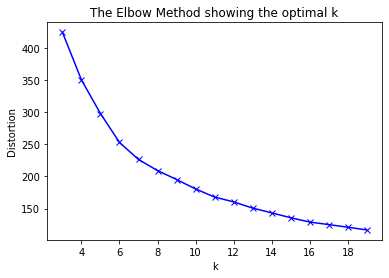

In [53]:
distortions = []
K = range(3,20)
for k in K:
    k_cluster = KMeans(n_clusters=k, max_iter=500, random_state=42).fit(data)
    k_cluster.fit(data)
    distortions.append(k_cluster.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [54]:
ids = list(df.index)

In [55]:
optimal_k = 7
kmeans_cluster = KMeans(n_clusters=optimal_k, 
                        init='k-means++', n_init=300, random_state=42).fit(data)
kmeans_labels = kmeans_cluster.labels_

In [56]:
# tạo dataframe để lưu id và giá trị của 2 thuật toán phân cụm
labels = pd.DataFrame(zip(ids, kmeans_labels), 
                            columns = ['ids','kmeans'])

In [57]:
from collections import Counter
Counter(kmeans_labels)

Counter({2: 353, 4: 352, 1: 484, 3: 272, 6: 288, 5: 402, 0: 279})

# Giảm số chiều của bộ dữ liệu để biểu diễn dữ liệu nhiều chiều trên không gian 2 chiều

In [27]:
from sklearn.manifold import TSNE

In [58]:
# nhúng dữ liệu nhiều com thành 2 com phục vụ cho việc biểu diễn trực quan trên đồ thị
trans = TSNE(n_components = 2, random_state = 42)
embeddings_2d = trans.fit_transform(data)

# tạo dataframe với dữ liệu là node và tọa độ x,y của nó
data_tsne = pd.DataFrame(zip(ids, list(embeddings_2d[:,0]),list(embeddings_2d[:,1])),
                        columns = ['ids','x','y'])
                        
data_tsne = pd.merge(data_tsne, labels, left_on='ids', right_on='ids', how = 'left')

### Vẽ biểu đồ

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

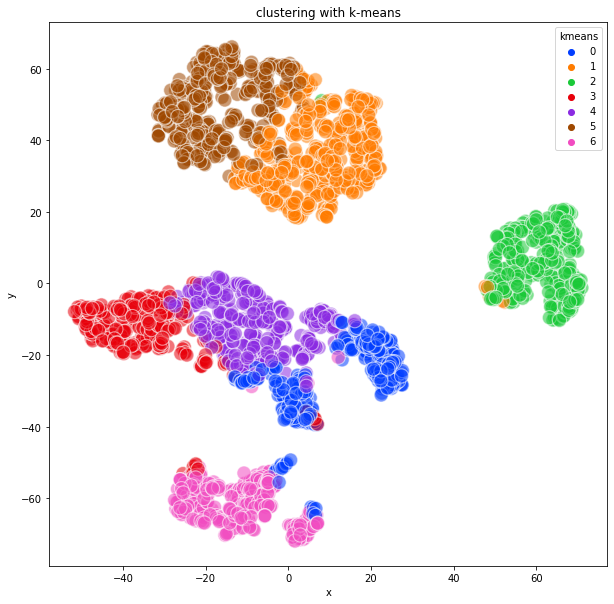

In [59]:
# vẽ đồ thị bằng thư viện seaborn
# k-mean
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_tsne, x='x', y='y',hue='kmeans', palette="bright",
               alpha=0.55, s=200).set_title('clustering with k-means')
plt.show

# Triển khai thuật toán phân loại với dữ liệu đã phân cụm

In [60]:
X = data
y = labels.values[:,-1]

### Xây dựng các model khác nhau để phân loại

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, make_scorer, precision_score, recall_score, f1_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(1822, 8)

### Model deep Neural Network

In [62]:
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(optimal_k, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=20, batch_size=128)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 7)                 119       
                                                                 
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
15/15 [==============================] - 0s 6ms/step - loss: 1.8677 - accuracy: 0.1822
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 1.7389 - accur

In [63]:
# hàm để tính đô chính xác trên cả tập train và tập test
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9605
Testing Accuracy:  0.9474


In [64]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        61
           1       0.98      0.95      0.97       108
           2       0.99      0.98      0.98        92
           3       0.85      0.99      0.91        67
           4       0.99      0.87      0.93       101
           5       0.96      0.98      0.97       100
           6       0.96      0.97      0.97        79

    accuracy                           0.95       608
   macro avg       0.94      0.95      0.94       608
weighted avg       0.95      0.95      0.95       608



In [66]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:  {:.4f}".format(accuracy))
print("Precision:  {:.4f}".format(precision))
print("Recall:  {:.4f}".format(recall))
print("F1 score:  {:.4f}".format(f1))

Accuracy:  0.9474
Precision:  0.9469
Recall:  0.9408
F1 score:  0.9425


### Model học máy

In [84]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# ensemble
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [48]:
model_dict ={
  'SVC': SVC(),
  'MultinomialNB': MultinomialNB(),
  'GaussianNB': GaussianNB(),
  'LinearRegression': LinearRegression(),
  'LogisticRegression': LogisticRegression(),
  'KNeighborsClassifier': KNeighborsClassifier(),
  'DecisionTreeClassifier': DecisionTreeClassifier(),
  'MLPClassifier': MLPClassifier(),
  'RandomForestClassifier': RandomForestClassifier(random_state=20),
  'AdaBoostClassifier': AdaBoostClassifier(random_state=20),
  'BaggingClassifier': BaggingClassifier(random_state=20)
}

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
eva_dict = {
  'Neural Network' : [accuracy,precision,recall,f1]
  }
print("-----------------------------------------------------")
for model_name in model_dict.keys():
  print(model_name)
  model = model_dict[model_name].fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred = [round(y) for y in y_pred]

  print("\t-----------------------------------------")
  print(classification_report(y_pred, y_test))
  print("-----------------------------------------------------")
  
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro') 
  f1 = f1_score(y_test, y_pred, average='macro')

  eva_dict[model_name] = [accuracy,precision,recall,f1]

-----------------------------------------------------
SVC
	-----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.98      1.00      0.99       103
           2       1.00      1.00      1.00        91
           3       0.90      1.00      0.95        70
           4       1.00      0.97      0.98        92
           5       1.00      0.98      0.99       104
           6       1.00      0.96      0.98        83

    accuracy                           0.98       608
   macro avg       0.98      0.98      0.98       608
weighted avg       0.98      0.98      0.98       608

-----------------------------------------------------
MultinomialNB
	-----------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.80      0.65        44
           1       1.00      0.54      0.70       196
           2       0.48     

In [68]:
model_eva = []
for model_name, model in eva_dict.items():
  model_eva.append([model_name] + list(model))

df_model = pd.DataFrame(model_eva, columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])
df_model = df_model.set_index('Model', drop= True)
df_model

,accuracy,precision,recall,f1-score
Model,,,,
Neural Network,0.947368,0.946894,0.940758,0.942460
SVC,0.980263,0.978640,0.978092,0.977824
MultinomialNB,0.666118,0.810596,0.652468,0.661471
GaussianNB,0.914474,0.913358,0.903055,0.906085
LinearRegression,0.281250,0.210539,0.163187,0.164341
LogisticRegression,0.970395,0.968933,0.964207,0.965508
KNeighborsClassifier,0.953947,0.951057,0.952037,0.950854
DecisionTreeClassifier,0.927632,0.922260,0.920884,0.921299
MLPClassifier,0.978618,0.976188,0.977712,0.976594


<AxesSubplot:xlabel='Model'>

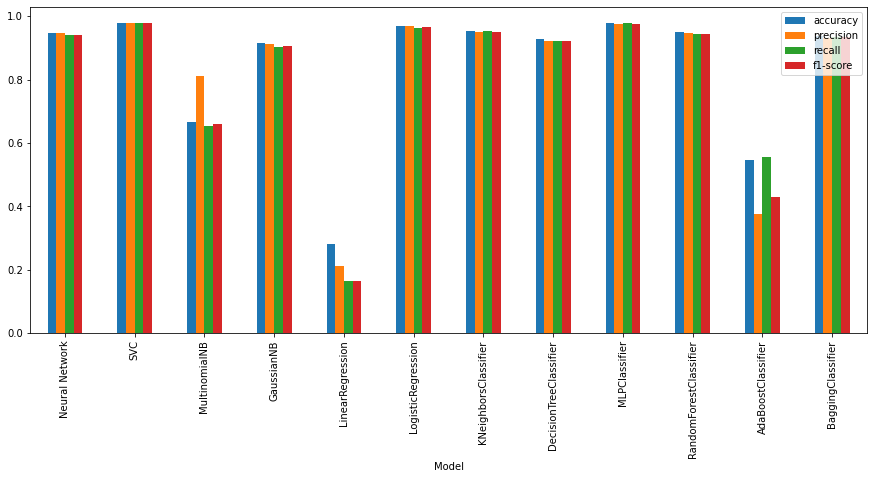

In [69]:
df_model.plot(kind="bar", figsize=(15,6))

### Ensemble Learning

In [114]:
ensemble_eva = []

#### Ensemble không sử dụng base_estimator

In [115]:
ada_only = AdaBoostClassifier(n_estimators=10, 
                        random_state=20).fit(X_train, y_train)

y_pred = ada_only.predict(X_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')

ensemble_eva .append(['AdaBoostClassifier Only', accuracy, precision, recall, f1])

              precision    recall  f1-score   support

           0       0.89      0.26      0.40       218
           1       1.00      0.51      0.67       207
           2       1.00      1.00      1.00        91
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.87      0.93        92

    accuracy                           0.55       608
   macro avg       0.56      0.38      0.43       608
weighted avg       0.96      0.55      0.66       608



In [116]:
bagging_only = BaggingClassifier(n_estimators=10, 
                        random_state=20).fit(X_train, y_train)

y_pred = bagging_only.predict(X_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')

ensemble_eva .append(['BaggingClassifier Only', accuracy, precision, recall, f1])

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        67
           1       0.96      0.98      0.97       103
           2       0.99      1.00      0.99        90
           3       0.88      0.88      0.88        78
           4       0.85      0.92      0.88        83
           5       0.99      0.96      0.98       105
           6       0.97      0.95      0.96        82

    accuracy                           0.94       608
   macro avg       0.93      0.93      0.93       608
weighted avg       0.94      0.94      0.94       608



In [117]:
rfc_only = RandomForestClassifier(n_estimators=10, 
                        random_state=20).fit(X_train, y_train)

y_pred = rfc_only.predict(X_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')

ensemble_eva .append(['RandomForestClassifier Only', accuracy, precision, recall, f1])

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        67
           1       0.97      0.98      0.98       104
           2       0.99      1.00      0.99        90
           3       0.91      0.89      0.90        80
           4       0.87      0.90      0.88        86
           5       0.99      0.97      0.98       104
           6       0.94      0.97      0.96        77

    accuracy                           0.94       608
   macro avg       0.93      0.93      0.93       608
weighted avg       0.94      0.94      0.94       608



#### Voting Classifier sử dụng nhiều model học máy cùng lúc

In [96]:
estimators = []
estimators.append(('logistic', LogisticRegression()))
estimators.append(('dt', DecisionTreeClassifier()))
estimators.append(('svm', SVC()))
estimators.append(('knn', KNeighborsClassifier()))
estimators

[('logistic', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('svm', SVC()),
 ('knn', KNeighborsClassifier())]

In [118]:
voting = VotingClassifier(estimators).fit(X_train, y_train)
y_pred = voting.predict(X_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro') 
f1 = f1_score(y_test, y_pred, average='macro')

ensemble_eva.append(['VotingClassifier', accuracy, precision, recall, f1])

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.98      1.00      0.99       103
           2       1.00      1.00      1.00        91
           3       0.91      0.99      0.95        72
           4       0.96      0.97      0.96        88
           5       1.00      0.98      0.99       104
           6       1.00      0.96      0.98        83

    accuracy                           0.97       608
   macro avg       0.97      0.97      0.97       608
weighted avg       0.97      0.97      0.97       608



In [119]:
ensemble_eva

[['AdaBoostClassifier Only',
  0.5460526315789473,
  0.37624176116397895,
  0.5555555555555556,
  0.4288408562388534],
 ['BaggingClassifier Only',
  0.9391447368421053,
  0.9328293898731301,
  0.9347926695887229,
  0.9334731620361113],
 ['RandomForestClassifier Only',
  0.9391447368421053,
  0.9328133443637732,
  0.9337966373527227,
  0.9330623219321721],
 ['VotingClassifier',
  0.9736842105263158,
  0.9703096060765546,
  0.9712351319092891,
  0.9703523623842567]]

#### Bagging Classifier

In [123]:
model_dict2 ={
  'with SVC': SVC(),
  'with MultinomialNB': MultinomialNB(),
  'with GaussianNB': GaussianNB(),
  #'LinearRegression': LinearRegression(), doesn't support sample_weight.
  'with LogisticRegression': LogisticRegression(),
  'with KNeighborsClassifier': KNeighborsClassifier(),
  'with DecisionTreeClassifier': DecisionTreeClassifier(),
  'with MLPClassifier': MLPClassifier(),
  'with RandomForestClassifier': RandomForestClassifier(random_state=20),
  'with AdaBoostClassifier': AdaBoostClassifier(random_state=20),
  'with BaggingClassifier': BaggingClassifier(random_state=20)
}

In [124]:
eva_dict_bagging = {}
for model_name in model_dict2.keys():
  print(model_name)
  bagging = BaggingClassifier(base_estimator=model_dict2[model_name], 
                        n_estimators=10, 
                        random_state=20).fit(X_train, y_train)

  y_pred = bagging.predict(X_test)
  y_pred = [round(y) for y in y_pred]
  print("\t\t-------------------------------------")
  print(classification_report(y_pred, y_test))
  print("-----------------------------------------------------")
  
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro') 
  f1 = f1_score(y_test, y_pred, average='macro')

  eva_dict_bagging[model_name] = [accuracy,precision,recall,f1]

with SVC
		-------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.98      1.00      0.99       103
           2       1.00      1.00      1.00        91
           3       0.91      0.99      0.95        72
           4       0.99      0.98      0.98        90
           5       1.00      0.98      0.99       104
           6       1.00      0.96      0.98        83

    accuracy                           0.98       608
   macro avg       0.98      0.98      0.98       608
weighted avg       0.98      0.98      0.98       608

-----------------------------------------------------
with MultinomialNB
		-------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.79      0.67        47
           1       1.00      0.55      0.71       190
           2       0.47      1.00      0.64        43
           3       0.68 

<AxesSubplot:xlabel='Ensemble Bagging Model'>

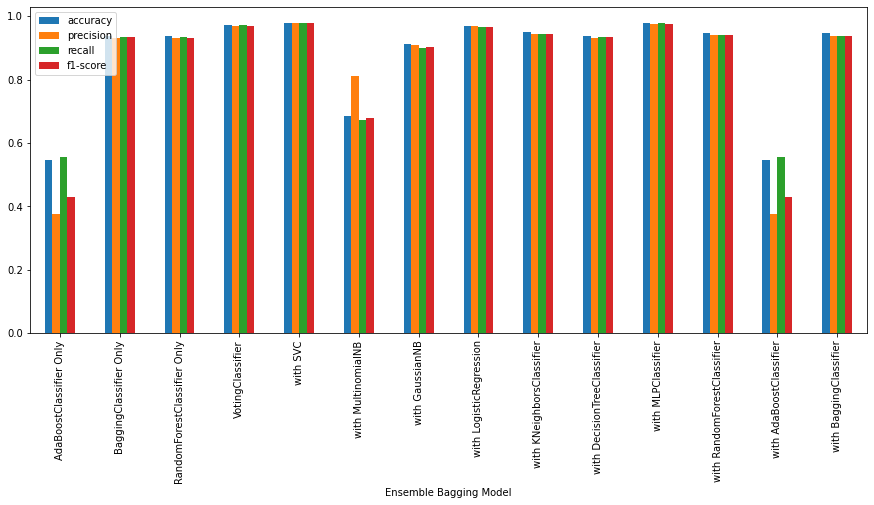

In [125]:
model_eva = ensemble_eva.copy()
for model_name, model in eva_dict_bagging.items():
  model_eva.append([model_name] + list(model))

df_model = pd.DataFrame(model_eva, columns=['Ensemble Bagging Model', 'accuracy', 'precision', 'recall', 'f1-score'])
df_model = df_model.set_index('Ensemble Bagging Model', drop= True)

df_model.plot(kind="bar", figsize=(15,6))

#### AdaBoost Classifier

In [126]:
model_dict3 ={
  #'SVC': SVC(), doesn't support sample_weight.
  'with MultinomialNB': MultinomialNB(),
  'with GaussianNB': GaussianNB(),
  #'LinearRegression': LinearRegression(), doesn't support sample_weight.
  'with LogisticRegression': LogisticRegression(),
  #'KNeighborsClassifier': KNeighborsClassifier(), doesn't support sample_weight.
  'with DecisionTreeClassifier': DecisionTreeClassifier(),
  #'MLPClassifier': MLPClassifier(), doesn't support sample_weight.
  'with RandomForestClassifier': RandomForestClassifier(random_state=20),
  'with AdaBoostClassifier': AdaBoostClassifier(random_state=20),
  'with BaggingClassifier': BaggingClassifier(random_state=20)
}

In [127]:
eva_dict_ada = {}
for model_name in model_dict3.keys():
  print(model_name)
  ada = AdaBoostClassifier(base_estimator=model_dict3[model_name], 
                        n_estimators=10, 
                        random_state=20).fit(X_train, y_train)

  y_pred = ada.predict(X_test)
  y_pred = [round(y) for y in y_pred]
  print("\t\t-------------------------------------")
  print(classification_report(y_pred, y_test))
  print("-----------------------------------------------------")
  
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro') 
  f1 = f1_score(y_test, y_pred, average='macro')

  eva_dict_ada[model_name] = [accuracy,precision,recall,f1]

with MultinomialNB
		-------------------------------------
              precision    recall  f1-score   support

           0       0.13      1.00      0.23         8
           1       1.00      0.44      0.61       237
           2       0.56      1.00      0.72        51
           3       0.19      1.00      0.32        15
           4       1.00      0.38      0.55       233
           5       0.10      1.00      0.18        10
           6       0.62      0.93      0.75        54

    accuracy                           0.54       608
   macro avg       0.51      0.82      0.48       608
weighted avg       0.88      0.54      0.59       608

-----------------------------------------------------
with GaussianNB
		-------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        63
           1       1.00      0.76      0.86       138
           2       0.96      0.95      0.95        92
           3     

<AxesSubplot:xlabel='Ensemble AdaBosst Model'>

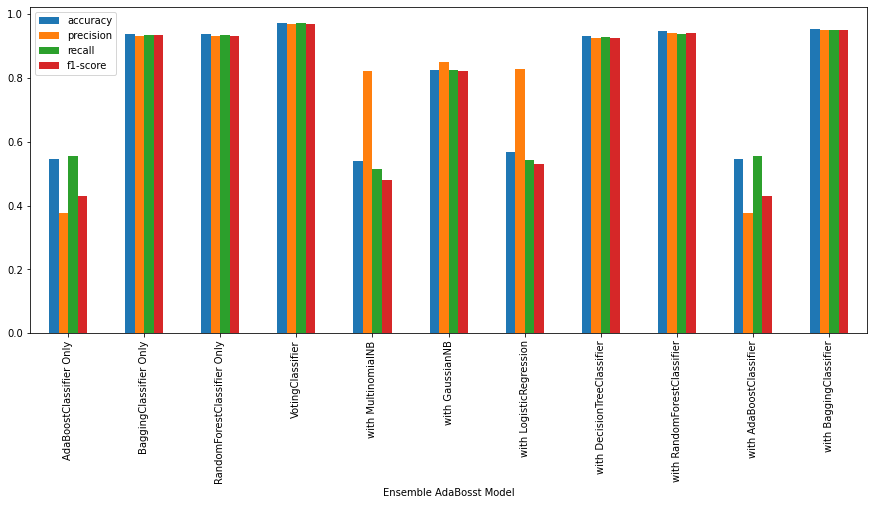

In [128]:
model_eva = ensemble_eva.copy()
for model_name, model in eva_dict_ada.items():
  model_eva.append([model_name] + list(model))

df_model = pd.DataFrame(model_eva, columns=['Ensemble AdaBosst Model', 'accuracy', 'precision', 'recall', 'f1-score'])
df_model = df_model.set_index('Ensemble AdaBosst Model', drop= True)

df_model.plot(kind="bar", figsize=(15,6))